  # <center>Exploratory Data Analysis<center>

   ### Dewali Sales Analysis

# Table Contents

1.[**Data Source**](#section1)<br>

2.[**Importing Packages.**](#section2)<br>

3.[**Loading Data.**](#section3)<br>

4.[**Data Information**](#section4)<br>

5.[**Data Cleaning**](#section6)<br>

6.[**Data Analysis.**](#section7)<br>

7.[**Summarization.**](#section8)<br>

## 1. Data Source

**Kaggle.com** is a the open source that provides the dataset of the Dewali Sales of an e-commerce store. It also provide the details about the gender, age, ocupation of customer and the customers are from where and which zone

## 2. Importing Packages

In [1]:
import numpy as np
#-------------------------------------
import pandas as pd
#-------------------------------------
import matplotlib.pyplot as plt
#------------------------------------
import seaborn as sns

## 3. Loading Data

In [2]:
df=pd.read_csv("Diwali Sales Data.csv",encoding='latin1')
print("Diwali Sales Data Shape:",df.shape)
df

Diwali Sales Data Shape: (11251, 13)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


## 4. Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


## Observation:

**We have 8 object data type features, 4 int64 data type features and 1 float64 data type features in this dataset.**

In [4]:
df.count()

User_ID             11251
Cust_name           11251
Product_ID          11251
Gender              11251
Age Group           11251
Age                 11251
Marital_Status      11251
State               11251
Zone                11251
Occupation          11251
Product_Category    11251
Orders              11251
Amount              11239
dtype: int64

# Number of Columns:

In [5]:
df.keys()

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# 5. Data Cleaning
**Checking for null values**

In [6]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

**CONCLUSION**

**We can there are 12 null values in one category Amount.**

# Fill null values:

In [7]:
df["Amount"].fillna(df["Amount"].mean())

0        23952.0
1        23934.0
2        23924.0
3        23912.0
4        23877.0
          ...   
11246      370.0
11247      367.0
11248      213.0
11249      206.0
11250      188.0
Name: Amount, Length: 11251, dtype: float64

**We have filled all the missing value with mean.**

In [8]:
df["Amount"].fillna(df["Amount"].mean(),inplace=True)

In [9]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

**We have successfully imputed the null values.**

### 6.1 Checking genderwise order placement data :

In [10]:
sales_gen=df.groupby("Gender")["Amount"].sum().sort_values(ascending=False).head(10)
sales_gen

Gender
F    7.443039e+07
M    3.193218e+07
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Top 10 Sales by Gender')

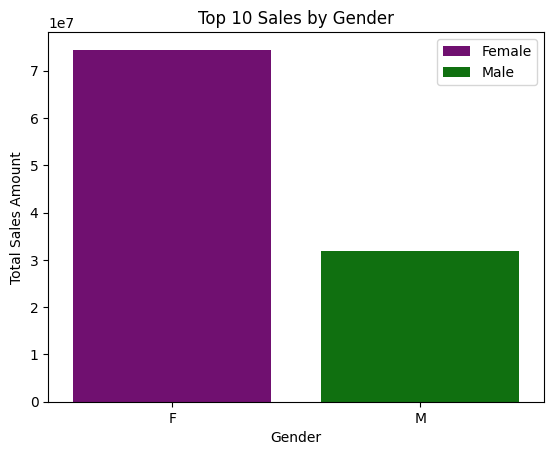

In [11]:
sns.barplot(x=sales_gen.index, y=sales_gen.values,hue=["Female","Male"],palette=["Purple","Green"])
plt.xlabel("Gender")
plt.ylabel("Total Sales Amount")
plt.title("Top 10 Sales by Gender")

**From the above graph , we can see most of the buyers are female.**

### 6.2 Checking State_wise Order

In [12]:
len(df["State"].value_counts())

16

In [13]:
sales_state=df.groupby("State")["Orders"].sum().sort_values(ascending=False).head(10)
sales_state

State
Uttar Pradesh       4813
Maharashtra         3811
Karnataka           3241
Delhi               2744
Madhya Pradesh      2259
Andhra Pradesh      2054
Himachal Pradesh    1568
Kerala              1137
Haryana             1109
Gujarat             1070
Name: Orders, dtype: int64

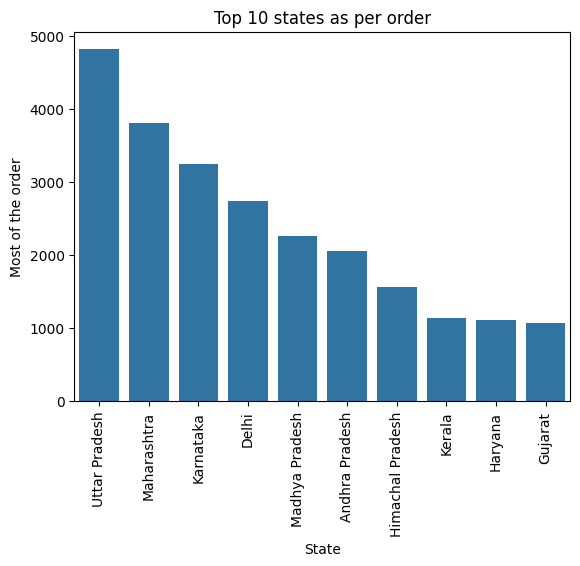

In [14]:
sns.barplot(x=sales_state.index, y=sales_state.values)
plt.xlabel("State")
plt.ylabel("Most of the order")
plt.xticks(rotation =90)
plt.title("Top 10 states as per order")
plt.show()

### Observation:

**We can see most of the buyers from Uttarpradesh and Maharashtra.**

### 6.3 Checking the Ocupation_wise Orders based on Gender

In [15]:
Occupation_Order=df.groupby("Occupation")["Orders"].sum().sort_values(ascending=False).head(10)
Occupation_Order

Occupation
IT Sector      4010
Healthcare     3455
Aviation       3215
Banking        2819
Govt           2155
Hospitality    1746
Media          1596
Automobile     1373
Lawyer         1344
Chemical       1310
Name: Orders, dtype: int64

In [16]:
df.loc[df["Occupation"]=="IT Sector"]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,9453.610858
12,1004035,Elijah,P00080342,F,18-25,20,1,Andhra Pradesh,Southern,IT Sector,Auto,2,23730.000000
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,9453.610858
22,1005256,Grant,P00101742,F,26-35,30,0,Andhra Pradesh,Southern,IT Sector,Auto,1,23518.000000
25,1005908,Eric,P00282642,F,26-35,33,0,Andhra Pradesh,Southern,IT Sector,Auto,3,23462.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11203,1000045,Byrd,P00205942,M,46-50,49,1,Maharashtra,Western,IT Sector,Veterinary,3,732.000000
11216,1000411,Prashant,P00313342,M,46-50,48,0,Gujarat,Western,IT Sector,Office,4,585.000000
11220,1004451,Ricardo,P00034642,F,26-35,30,1,Delhi,Central,IT Sector,Office,2,579.000000
11238,1002718,Abhishek,P00003442,M,26-35,28,0,Karnataka,Southern,IT Sector,Office,1,555.000000


In [17]:
O_G=df.loc[df["Occupation"]=="IT Sector"].groupby(["Gender"])["Orders"].sum()
O_G

Gender
F    2701
M    1309
Name: Orders, dtype: int64

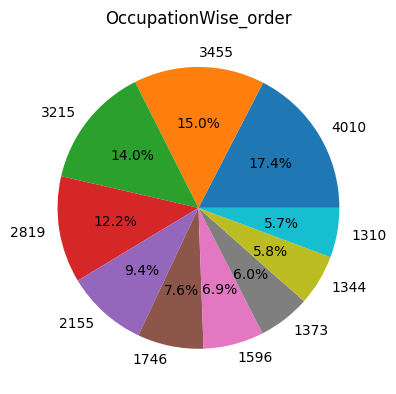

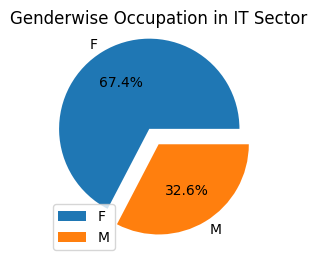

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(x=Occupation_Order, labels=Occupation_Order,autopct='%1.1f%%')
plt.title("OccupationWise_order")
plt.show()

plt.subplot(1,2,2)
plt.pie(x=O_G.values, labels=O_G.index, autopct="%1.1f%%",explode=(0.2,0))
plt.title("Genderwise Occupation in IT Sector")
plt.legend()
plt.show()

### CONCLUSION:

**From these pie-chart we can see most of buyers doing job in IT Sector and percentage of female buyer is more than male buyer.**

###  6.4 Age_Gender Based Sales Analyse

In [19]:
sales_age = df.groupby("Age Group")["Amount"].sum().sort_values(ascending = False).reset_index()
sales_age

,Age Group,Amount
0,26-35,4.263235e+07
1,36-45,2.217336e+07
2,18-25,1.724073e+07
3,46-50,9.245658e+06
4,51-55,8.280384e+06
5,55+,4.090441e+06
6,0-17,2.699653e+06


<Axes: xlabel='Age Group', ylabel='Amount'>

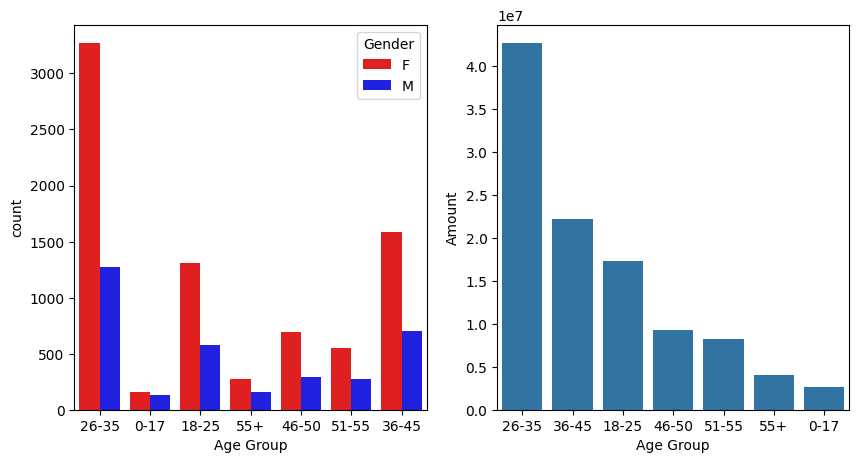

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x="Age Group", hue="Gender", palette=["Red","Blue"])


plt.subplot(1,2,2)
sns.barplot(x = "Age Group", y = "Amount", data =sales_age)

**Most of the buyers are female and they are from 26 to 35 years old.**

The chart presented above indicates that the age group of 26-35 made the highest number of purchases, while the age group of 55+ made the least number of purchases. Moreover, the data shows that females are the primary purchasers across all age groups, regardless of age range.

### 6.5 Most Selled Product Category

In [21]:
Product_Sales= df.groupby("Product_Category")["Orders"].sum().sort_values(ascending=False).head(10)
Product_Sales

Product_Category
Clothing & Apparel       6634
Food                     6120
Electronics & Gadgets    5226
Footwear & Shoes         2654
Household items          1331
Beauty                   1086
Games & Toys              940
Furniture                 890
Sports Products           870
Pet Care                  536
Name: Orders, dtype: int64

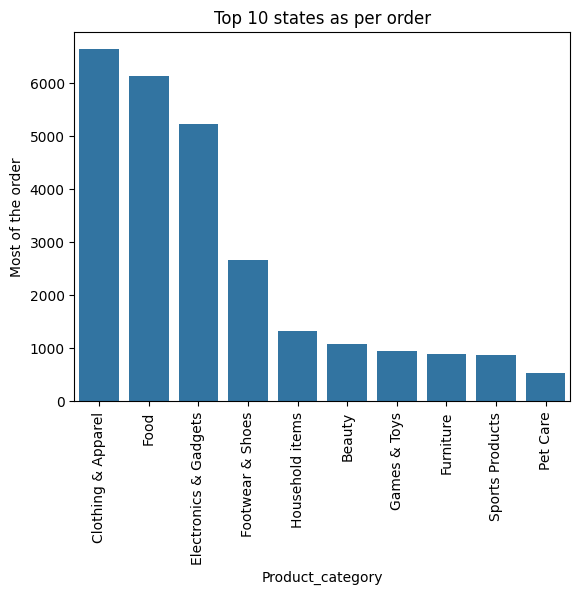

In [22]:
sns.barplot(x=Product_Sales.index, y=Product_Sales.values)
plt.xlabel("Product_category")
plt.ylabel("Most of the order")
plt.xticks(rotation =90)
plt.title("Top 10 states as per order")
plt.show()

**Most of the buyers purchase Cloth and Apparel.**

In [23]:
Product_P= df.groupby("Product_Category")["Amount"].sum().sort_values(ascending=False)
Product_P

Product_Category
Food                     3.396224e+07
Clothing & Apparel       1.649502e+07
Electronics & Gadgets    1.564385e+07
Footwear & Shoes         1.562248e+07
Furniture                5.449506e+06
Games & Toys             4.331694e+06
Sports Products          3.635933e+06
Auto                     1.986971e+06
Beauty                   1.959484e+06
Stationery               1.676052e+06
Household items          1.569337e+06
Tupperware               1.155642e+06
Books                    1.061478e+06
Decor                    7.303600e+05
Pet Care                 4.822770e+05
Hand & Power Tools       4.056180e+05
Veterinary               1.127020e+05
Office                   8.193600e+04
Name: Amount, dtype: float64

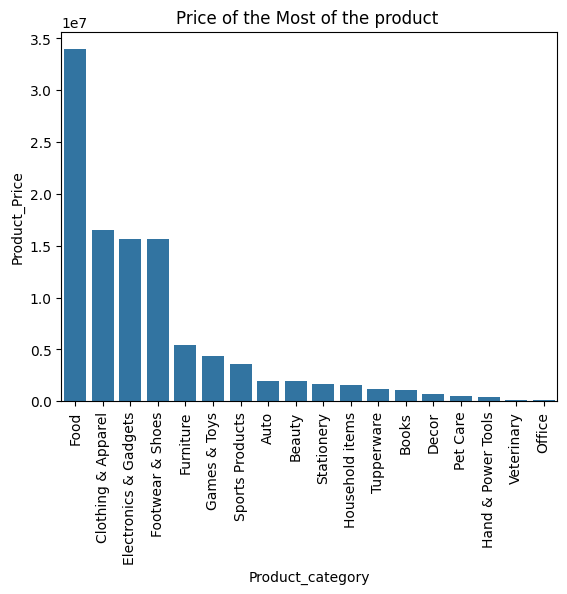

In [24]:
sns.barplot(x=Product_P.index, y=Product_P.values)
plt.xlabel("Product_category")
plt.ylabel("Product_Price")
plt.xticks(rotation =90)
plt.title("Price of the Most of the product ")
plt.show()

### Conclusion:

**Price of the Food is more than the others product category.**

## 6.6 Gender wise Product Category Sales

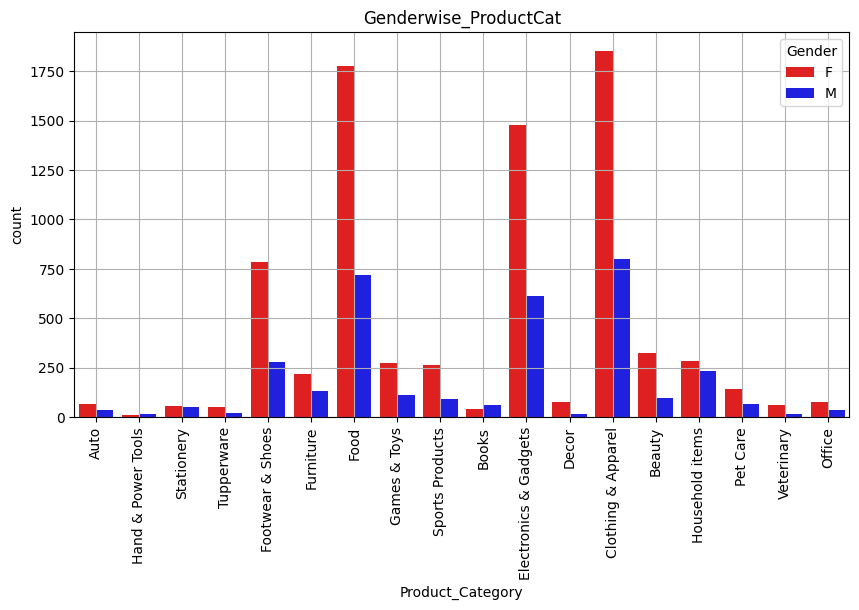

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Product_Category", hue="Gender",palette=["Red","Blue"])
plt.xticks(rotation =90)
plt.title("Genderwise_ProductCat")
plt.grid()
plt.show()

### Conclusion:

**Female buyers are almost more than male in every category.**

## 7. Summerization:

**So according to the analyse in can be determined that most of the buyers are from Uttar Pradesh followed by Maharashtra and Karnataka.**

**Most of the buyers are working in IT Sector and number of female buyers are more than male.**

**Their age is in between 26 to 35. Most selled product in this dataset is Cloths and apperal, Food and Electronics.**